# <center><font color='MediumSeaGreen'>Desafío - Regresión desde la econometría</font><center>

### <center><b> Bárbara Pérez </b><center>

_________

## <font color='MediumSeaGreen'>Descripción</font>

En la empresa en la cual te encuentras contratado, te solicitan trabajar con un registro de clientes de un banco e información sobre su salud financiera. La base contenida en el csv <span style='background:gainsboro'><font color='dimgray'>Credit</font></span> abarca las siguientes variables:

● <span style='background:gainsboro'><font color='dimgray'>Income</font></span>: Ingreso anual disponible en miles de dólares.

● <span style='background:gainsboro'><font color='dimgray'>Limit</font></span>: Límite del crédito.

● <span style='background:gainsboro'><font color='dimgray'>Rating</font></span>: Ranking del crédito.

● <span style='background:gainsboro'><font color='dimgray'>Cards</font></span>: Cantidad de tarjetas de crédito.

● <span style='background:gainsboro'><font color='dimgray'>Age</font></span>: Edad del usuario.

● <span style='background:gainsboro'><font color='dimgray'>Education</font></span>: Años de educación del usuario.

● <span style='background:gainsboro'><font color='dimgray'>Gender</font></span>: ¿Hombre o mujer?

● <span style='background:gainsboro'><font color='dimgray'>Student</font></span>: ¿Es estudiante?

● <span style='background:gainsboro'><font color='dimgray'>Married</font></span>: ¿Está casado?

● <span style='background:gainsboro'><font color='dimgray'>Ethnicity</font></span>: Etnicidad del usuario (Caucásico, Afroamericano, Asiático)

● <span style='background:gainsboro'><font color='dimgray'>Balance</font></span>: Promedio de deuda en tarjeta de crédito de usuario.

El objetivo que persigue el trabajo con esta base de datos es conocer los determinantes de la variación en el promedio de deuda en tarjeta de crédito. Para ello se te solicita generar modelos econométricos para inspeccionar los efectos de distintos atributos a partir de requerimientos que serán detallados más adelante.

____

## <font color='MediumSeaGreen'>Requerimientos</font> 

<b><font color='MediumSeaGreen'>1.</font> Preparar el ambiente de trabajo (1 puntos)</b>,Para ello debes:

● Importe las librerías básicas para el análisis de datos.

● Incluya los import base de <span style='background:gainsboro'><font color='dimgray'>statsmodels</font></span>.

● Importe la base de datos <span style='background:gainsboro'><font color='dimgray'>Credit.csv</font></span> y elimine la columna <span style='background:gainsboro'><font color='dimgray'>Unnamed: 0</font></span>.

● Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de <span style='background:gainsboro'><font color='dimgray'>Ethnicity</font></span>, genere binarias
para <span style='background:gainsboro'><font color='dimgray'>African</font></span>, <span style='background:gainsboro'><font color='dimgray'>American</font></span>, <span style='background:gainsboro'><font color='dimgray'>Caucasian</font></span> y <span style='background:gainsboro'><font color='dimgray'>Asian</font></span>.

**Tip:** Utilice <span style='background:gainsboro'><font color='dimgray'>value_counts()</font></span> para revisar la cantidad de casos en las variables categóricas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

In [2]:
#importar el dataframe
df = pd.read_csv('credit.csv')

In [3]:
#Revisamos el dataframe
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
#Eliminamos 'Unnamed: 0'
df=df.drop(['Unnamed: 0'], axis=1)

In [5]:
#Obtenemos el tipo de informacion que tiene el dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [6]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [7]:

#Definimos la variables categóricas
variables_categoricas = []
for n, i in enumerate(df):
    if df[i].dtypes =="object":
        variables_categoricas.append(i)
variables_categoricas    

['Gender', 'Student', 'Married', 'Ethnicity']

In [8]:
#inspeccionamos la variables categóricas para identificar el grupo minoritario
for i in variables_categoricas:
    print("\n",i)
    print(df[i].value_counts())
    print((df[i].value_counts()/len(df[i])))


 Gender
Female    207
 Male     193
Name: Gender, dtype: int64
Female    0.5175
 Male     0.4825
Name: Gender, dtype: float64

 Student
No     360
Yes     40
Name: Student, dtype: int64
No     0.9
Yes    0.1
Name: Student, dtype: float64

 Married
Yes    245
No     155
Name: Married, dtype: int64
Yes    0.6125
No     0.3875
Name: Married, dtype: float64

 Ethnicity
Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64
Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64


● Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de <span style='background:gainsboro'><font color='dimgray'>Ethnicity</font></span>, genere binarias
para <span style='background:gainsboro'><font color='dimgray'>African</font></span>, <span style='background:gainsboro'><font color='dimgray'>American</font></span>, <span style='background:gainsboro'><font color='dimgray'>Caucasian</font></span> y <span style='background:gainsboro'><font color='dimgray'>Asian</font></span>.

In [9]:
#Se observa que Male de la variable  'Gender' tiene un espacio, por lo que nos aseguramos , revisaremos y eliminaremos dicho espacio.

#revisamos la variable 'Gender'
df['Gender'][0]

' Male'

In [10]:
#limpiamos la variable 'Gender' de los espacios en blanco
df['Gender'] = df['Gender'].str.strip()

In [11]:
#Binarizamos el grupo minoritario de cada vaariable
df['Is_Male']= np.where(df['Gender'] == 'Male',1,0 )
df['Is_Student']= np.where(df['Student'] == 'Yes',1,0 )
df['Not_Married']= np.where(df['Married'] == 'No',1,0 )
df['Is_African_American']= np.where(df['Ethnicity'] == 'African American',1,0 )
df['Is_Asian']= np.where(df['Ethnicity'] == 'Asian',1,0 )

In [12]:
#verificamos cambios realizados
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Is_Male,Is_Student,Not_Married,Is_African_American,Is_Asian
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,1,0,0,0,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,0,0,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0,1,0,1
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,0,1,0,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1,0,0,0,0


<b><font color='MediumSeaGreen'>2.</font> Generar gráficos descriptivos para las variables continuas (1 puntos):</b>

● Genere una función llamada <span style='background:gainsboro'><font color='dimgray'>plot_hist</font></span> que genere un histograma de la variable e indique la media y mediana de la misma. Agregue una leyenda para indicar qué representa cada línea.

● ¿Cuál es el comportamiento de <span style='background:gainsboro'><font color='dimgray'>Balance</font></span>, <span style='background:gainsboro'><font color='dimgray'>Income</font></span>, <span style='background:gainsboro'><font color='dimgray'>Cards</font></span> y <span style='background:gainsboro'><font color='dimgray'>Rating</font></span>?

In [13]:
#generamos la función llamada plot_hist

def plot_hist(dataframe, variable):
    df_temp = dataframe
    sns.distplot(df_temp[variable])
    
    mean=df_temp[variable].mean()
    
    median=df_temp[variable].median()
    
    plt.axvline(mean, color='tomato')
    plt.axvline(median, color='green')
    plt.legend({'Media':mean,'Mediana':median})

● ¿Cuál es el comportamiento de <span style='background:gainsboro'><font color='dimgray'>Balance</font></span>, <span style='background:gainsboro'><font color='dimgray'>Income</font></span>, <span style='background:gainsboro'><font color='dimgray'>Cards</font></span> y <span style='background:gainsboro'><font color='dimgray'>Rating</font></span>?

C:\ProgramData\Anaconda3\envs\rstudio\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


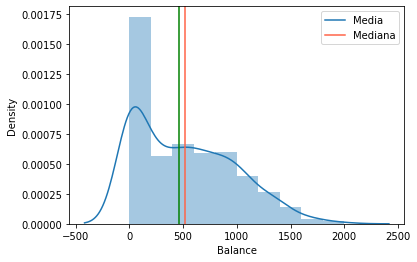

In [14]:
plot_hist(df, 'Balance')

- Se observa una distribución bimodal con sesgo positivo (hacia la derecha)

C:\ProgramData\Anaconda3\envs\rstudio\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


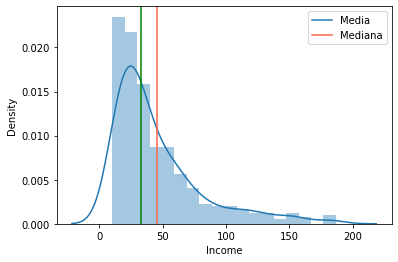

In [15]:
plot_hist(df, 'Income')

- Se observa una distribución con sesgo positivo.

C:\ProgramData\Anaconda3\envs\rstudio\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


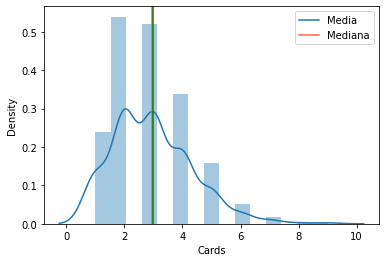

In [16]:
plot_hist(df, 'Cards')

- Se observa una distribución bimodal con leve sesgo positivo

C:\ProgramData\Anaconda3\envs\rstudio\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


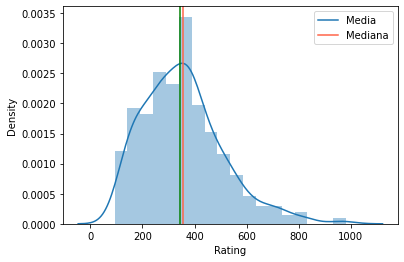

In [17]:
plot_hist(df, 'Rating')

- Se observa una distribución con leve sesgo positivo


___

<b><font color='MediumSeaGreen'>3.</font> Regresión Lineal Simple (2 puntos).</b> Para ello se debe:

● Generar una serie de modelos simples:

* $Balance = \beta_{0} + \beta{1} \times Student + \epsilon$
* $Balance = \beta_{0} + \beta{1} \times Income + \epsilon$
* $Balance = \beta_{0} + \beta{1} \times Rating + \epsilon$


● Utilizando <span style='background:gainsboro'><font color='dimgray'>statsmodels</font></span>, comente brevemente los siguientes puntos:

○ ¿Qué variable presenta un mayor poder explicativo de la variabilidad de <span style='background:gainsboro'><font color='dimgray'>Balance</font></span>?

○ ¿Qué podemos decir sobre el comportamiento de <span style='background:gainsboro'><font color='dimgray'>Student</font></span>?

○ ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de <span style='background:gainsboro'><font color='dimgray'>Balance</font></span> entre aquellos que son y no son estudiantes?


In [18]:
#Creamos los modelos respectivos
variables = ['Student', 'Income', 'Rating', 'Cards', 'Age', 'Education']
modelos = {}
for v in variables:
    modelos[v] = smf.ols('Balance ~ '+v,df).fit()
    print("\n\n")
    print(f"Summary2 Modelo \033[1mBalance ~ {v}\033[0m:\n")
    print(modelos[v].summary2())    




Summary2 Modelo Balance ~ Student:

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.065     
Dependent Variable: Balance          AIC:                6014.9327 
Date:               2022-07-21 20:32 BIC:                6022.9156 
No. Observations:   400              Log-Likelihood:     -3005.5   
Df Model:           1                F-statistic:        28.62     
Df Residuals:       398              Prob (F-statistic): 1.49e-07  
R-squared:          0.067            Scale:              1.9769e+05
-------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept        480.3694  23.4338 20.4990 0.0000 434.2998 526.4390
Student[T.Yes]   396.4556  74.1043  5.3500 0.0000 250.7707 542.1404
-------------------------------------------------------------------
Omnibus:              20.86

○ **¿Qué variable presenta un mayor poder explicativo de la variabilidad de <span style='background:gainsboro'><font color='dimgray'>Balance</font></span>?**


La variable que presenta un mayor poder explicativo de la variabilidad de Balance es *Rating*, ya que presenta un R cuadrado 0.746, valor que supera las otras variables

○ **¿Qué podemos decir sobre el comportamiento de <span style='background:gainsboro'><font color='dimgray'>Student</font></span>?**

A pesar de tener un R cuadrado pequeño de  0.067 , tiene un coeficiente de 396.4556, lo que es significativamente alto, especialmente considerando que el numero de estudiantes es muy pequeño, son 10 en total.

○ **¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de <span style='background:gainsboro'><font color='dimgray'>Balance</font></span> entre aquellos que son y no son estudiantes?**

In [19]:
#creamos nuestra función para la prueba de hipótesis
def prueba_de_hipotesis(dataframe, variable, binarize):
    df_grupo1 = dataframe[dataframe[binarize]==1]
    df_grupo0 = dataframe[dataframe[binarize]==0]
    tests = stats.ttest_ind(df_grupo1[variable].dropna(),df_grupo0[variable].dropna())
    valor_t = round(tests[0], 6)
    valor_p = round(tests[1], 6)
    media1 = round(df_grupo1[variable].mean(), 2)
    media0 = round(df_grupo0[variable].mean(), 2)
    diferencia_absoluta_medias = round(abs(media0 - media1), 6)
    print(f"\n\033[1mVariable '{variable}'\033[0m, con \033[1mindicador de binarización '{binarize}'\033[0m:")
    print(f"\tMedia grupo 0: {media0}, Media grupo 1: {media1}")
    print(f"\tValor absoluto de la diferencia entre las medias: {diferencia_absoluta_medias}")
    print(f"\tValor t: {valor_t}, Valor p: {valor_p}")

In [20]:
prueba_de_hipotesis(df, 'Balance', 'Is_Student')


Variable 'Balance', con indicador de binarización 'Is_Student':
	Media grupo 0: 480.37, Media grupo 1: 876.82
	Valor absoluto de la diferencia entre las medias: 396.45
	Valor t: 5.349964, Valor p: 0.0


Al realizar la prueba de hipótesis comprobamos que existe evidencia estadística para rechazar la hipótesis nula, por lo que aceptamos la hipótesis alternativa de que: los valores de 'balance' de los estudiantes y no estudiantes son significativamente diferentes.


_________

<b><font color='MediumSeaGreen'>4.</font> Generar un modelo que incluya todos los regresores (2 puntos):</b>

A partir de la siguiente fórmula, genere el modelo que incluya dichos regresores y comente brevemente sobre el poder explicativo en la varianza de 𝑦 y las principales características de los predictores.

$Balance_{i} = \beta_{0} + \sum_j^N\beta_{j}\times X_{ij} + \epsilon_{i}$

In [21]:
#Revisamos los tipos de datos que tenemos en nuestro df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               400 non-null    float64
 1   Limit                400 non-null    int64  
 2   Rating               400 non-null    int64  
 3   Cards                400 non-null    int64  
 4   Age                  400 non-null    int64  
 5   Education            400 non-null    int64  
 6   Gender               400 non-null    object 
 7   Student              400 non-null    object 
 8   Married              400 non-null    object 
 9   Ethnicity            400 non-null    object 
 10  Balance              400 non-null    int64  
 11  Is_Male              400 non-null    int32  
 12  Is_Student           400 non-null    int32  
 13  Not_Married          400 non-null    int32  
 14  Is_African_American  400 non-null    int32  
 15  Is_Asian             400 non-null    int

In [22]:
#definimos la variables no categóricas

variables_no_categoricas = []

for n, i in enumerate(df):
    if (i !='Balance' and df[i].dtypes !="object"):
        variables_no_categoricas.append(i)
variables_independientes = "+".join(variables_no_categoricas)

variables_independientes

'Income+Limit+Rating+Cards+Age+Education+Is_Male+Is_Student+Not_Married+Is_African_American+Is_Asian'

In [23]:
#creamos el modelo saturado
modelo_saturado = smf.ols('Balance ~ '+variables_independientes, data=df)
modelo_saturado = modelo_saturado.fit()
modelo_saturado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                  OLS                Adj. R-squared:       0.954    
Dependent Variable:     Balance            AIC:                  4821.3704
Date:                   2022-07-21 20:32   BIC:                  4869.2680
No. Observations:       400                Log-Likelihood:       -2398.7  
Df Model:               11                 F-statistic:          750.3    
Df Residuals:           388                Prob (F-statistic):   1.11e-253
R-squared:              0.955              Scale:                9759.6   
--------------------------------------------------------------------------
                      Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
--------------------------------------------------------------------------
Intercept           -488.2880  34.8161 -14.0248 0.0000 -556.7397 -419.8362
Income                -7.8031   0.2342 -33.3136 0.0000   -8.2636   -7.3426
Limit                  0.1909   0.0328   5.8241 0.0000    0.1265    0.2554
Rating                 1.1365   0.4909   2.3152 0.0211    0.1714    2.1017
Cards                 17.7245   4.3410   4.0830 0.0001    9.1896   26.2594
Age                   -0.6139   0.2940  -2.0882 0.0374   -1.1919   -0.0359
Education             -1.0989   1.5980  -0.6877 0.4921   -4.2406    2.0429
Is_Male               10.6532   9.9140   1.0746 0.2832   -8.8386   30.1451
Is_Student           425.7474  16.7226  25.4594 0.0000  392.8691  458.6256
Not_Married            8.5339  10.3629   0.8235 0.4107  -11.8405   28.9083
Is_African_American  -10.1070  12.2099  -0.8278 0.4083  -34.1129   13.8989
Is_Asian               6.6972  12.1224   0.5525 0.5810  -17.1367   30.5310
--------------------------------------------------------------------------
Omnibus:                 34.899          Durbin-Watson:             1.968 
Prob(Omnibus):           0.000           Jarque-Bera (JB):          41.766
Skew:                    0.782           Prob(JB):                  0.000 
Kurtosis:                3.241           Condition No.:             37395 
==========================================================================
* The condition number is large (4e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

Se observa que el modelo explica en un 0.955 la varianza de la variable  Balance', sin embargo se aprecia que en las variables 'Age', 'Education', 'Is_Male', 'Not_Married', 'Is_African_American' y 'Is_Asian' no aportan significativamente a la predicción del valor de la variable dependiente.

_________

<b><font color='MediumSeaGreen'>5.</font> Depurar el modelo e incluya sólo los predictores significativo (2 puntos)</b>

● En base al modelo anterior, refactoriza e incluya sólo las variables con un nivel de significancia 𝑝 − 𝑣𝑎𝑙𝑢𝑒 ≤. 025. Comente brevemente sobre el poder
explicativo en la varianza de 𝑦 y las principales características de los
predictores.

● ¿Mejoró o empeoró el modelo con la reducción de regresores?

In [24]:
variables_no_categoricas

['Income',
 'Limit',
 'Rating',
 'Cards',
 'Age',
 'Education',
 'Is_Male',
 'Is_Student',
 'Not_Married',
 'Is_African_American',
 'Is_Asian']

In [25]:
#eliminamos las variables con una significancia >= 0.025
variables_no_categoricas.remove('Age')
variables_no_categoricas.remove('Education')
variables_no_categoricas.remove('Is_Male')
variables_no_categoricas.remove('Not_Married')
variables_no_categoricas.remove('Is_African_American')
variables_no_categoricas.remove('Is_Asian')

In [26]:
#verificamos
variables_no_categoricas

['Income', 'Limit', 'Rating', 'Cards', 'Is_Student']

In [27]:
variables_independientes = "+".join(variables_no_categoricas)
variables_independientes

'Income+Limit+Rating+Cards+Is_Student'

In [28]:
modelo_depurado = smf.ols('Balance ~ '+variables_independientes, data=df)
modelo_depurado = modelo_depurado.fit()
modelo_depurado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.954    
Dependent Variable: Balance          AIC:                4817.6668
Date:               2022-07-21 20:32 BIC:                4841.6156
No. Observations:   400              Log-Likelihood:     -2402.8  
Df Model:           5                F-statistic:        1640.    
Df Residuals:       394              Prob (F-statistic): 3.60e-261
R-squared:          0.954            Scale:              9812.4   
------------------------------------------------------------------
              Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept   -526.1555  19.7466 -26.6454 0.0000 -564.9774 -487.3336
Income        -7.8749   0.2315 -34.0236 0.0000   -8.3300   -7.4199
Limit          0.1944   0.0325   5.9768 0.0000    0.1305    0.2584
Rating         1.0879   0.4870   2.2339 0.0260    0.1305    2.0453
Cards         17.8517   4.3349   4.1182 0.0000    9.3293   26.3741
Is_Student   426.8501  16.5740  25.7542 0.0000  394.2656  459.4347
------------------------------------------------------------------
Omnibus:               30.263       Durbin-Watson:          1.949 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       35.257
Skew:                  0.722        Prob(JB):               0.000 
Kurtosis:              3.179        Condition No.:          21155 
==================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

**Comente brevemente sobre el poder
explicativo en la varianza de 𝑦 y las principales características de los
predictores.**

Eliminando las variables da como rsultado el mismo R cuadrado, lo que significa que las varibles eliminadas no son significativas para predecir 'Balance'.

- 'Income': Se aprecia una relación inversamente proporcional con 'Balance'.

- 'Limit': Se aprecia un bajo aporte marginal al incremento de 'Balance'.

- 'Rating': Luego de la depuración del modelo, su  𝑝_𝑣𝑎𝑙𝑢𝑒  aumentó a 0.026.

- 'Cards': Se aprecia una relación directamente proporcional con 'Balance', siendo la segunda variable con mayor aporte marginal.

- 'Is_Student': Variable binaria con el mayor aporte marginal a 'Balance'.

**¿Mejoró o empeoró el modelo con la reducción de regresores?**

El modelo se mantiene ya que no varia el R cuadrado, aunque mejora la eficiencia del modelo ya que recorre menos variables

_______

<b><font color='MediumSeaGreen'>6.</font> Utilizando <span style='background:gainsboro'><font color='dimgray'>lmplot</font></span> de <span style='background:gainsboro'><font color='dimgray'>seaborn</font></span>, inspeccione el comportamiento de los tres principales determinantes. (2 puntos)</b>


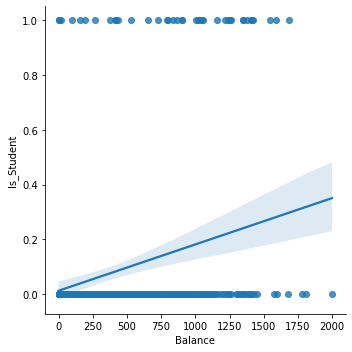

In [29]:
sns.lmplot(x="Balance", y="Is_Student", data=df)

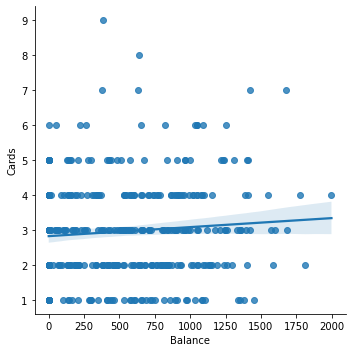

In [30]:
sns.lmplot(x="Balance", y="Cards", data=df)

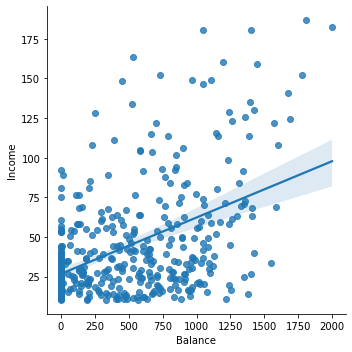

In [31]:
sns.lmplot(x="Balance", y="Income", data=df)

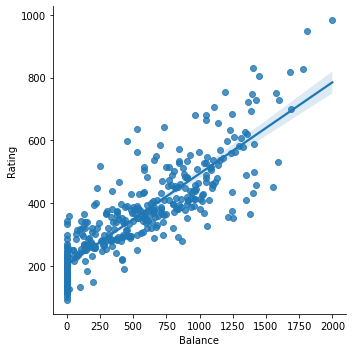

In [32]:
sns.lmplot(x="Balance", y="Rating", data=df)

_____